In [6]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# Load the dataset
# -------------------------
path = "."
file_name = "data_preprocessed.csv"
full_file_path = os.path.join(path, file_name)

data_set = pd.read_csv(full_file_path)

# -------------------------
# Encode categorical columns
# -------------------------
label_encoders = {}

for col in data_set.columns:
    if data_set[col].dtype == "object":   # Categorical column
        le = LabelEncoder()
        data_set[col] = le.fit_transform(data_set[col].astype(str))
        label_encoders[col] = le          # Store encoder for decoding later

# -------------------------
# Identify features & target
# -------------------------
if "Osteoporosis" not in data_set.columns:
    raise ValueError("Target column 'Osteoporosis' not found in dataset.")

X = data_set.drop("Osteoporosis", axis=1)
y = data_set["Osteoporosis"]

# -------------------------
# Train-test split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# -------------------------
# Train Naive Bayes model
# -------------------------
model = GaussianNB()
model.fit(X_train, y_train)

# -------------------------
# Make predictions
# -------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

report = classification_report(y_test, y_pred, target_names=['Osteoporosis = 0', 'Osteoporosis = 1'])
auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()


- Confusion matrix



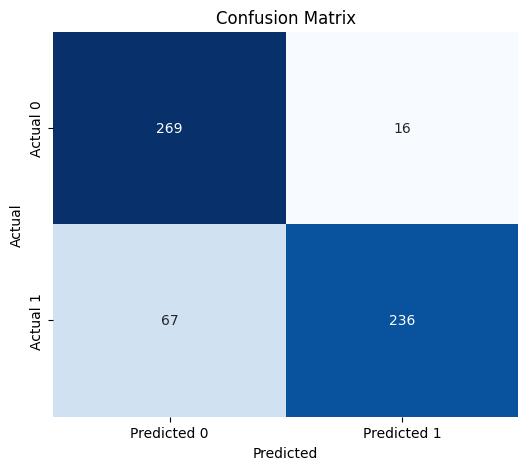

In [7]:
# -----------------------------
# Vẽ Confusion Matrix
# -----------------------------
print("\n- Confusion matrix\n")
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [8]:
# -----------------------------
# Kết quả mô hình
# -----------------------------
print("\n- Chi tiết confusion matrix:")
print(f"+ True Negative (TN):  {TN} - Dự đoán đúng 'Không có'")
print(f"+ False Positive (FP): {FP} - Dự đoán sai 'Có' (thực tế 'Không có')")
print(f"+ False Negative (FN): {FN} - Dự đoán sai 'Không có' (thực tế 'Có')")
print(f"+ True Positive (TP):   {TP} - Dự đoán đúng 'Có'")
print("\n- Classification report\n", report)
print(f"AUC-ROC:   {auc:.3f} ({auc*100:.0f}%)")


- Chi tiết confusion matrix:
+ True Negative (TN):  269 - Dự đoán đúng 'Không có'
+ False Positive (FP): 16 - Dự đoán sai 'Có' (thực tế 'Không có')
+ False Negative (FN): 67 - Dự đoán sai 'Không có' (thực tế 'Có')
+ True Positive (TP):   236 - Dự đoán đúng 'Có'

- Classification report
                   precision    recall  f1-score   support

Osteoporosis = 0       0.80      0.94      0.87       285
Osteoporosis = 1       0.94      0.78      0.85       303

        accuracy                           0.86       588
       macro avg       0.87      0.86      0.86       588
    weighted avg       0.87      0.86      0.86       588

AUC-ROC:   0.901 (90%)
